In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report


In [80]:

source_file = 'covid_19_data.csv'
data = pd.read_csv(source_file)
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [81]:
india_data = data.drop(columns=['SNo', 'Last Update','Province/State'])
india_data = india_data.loc[india_data['Country/Region'] == 'India']

india_data["ObservationDate"] = india_data["ObservationDate"].apply(lambda x:int(datetime.strptime(x,"%m/%d/%Y").toordinal()))
firstday = india_data["ObservationDate"].iloc[0]
india_data["ObservationDate"] = india_data["ObservationDate"].apply(lambda x: x-firstday)

aggregation_functions = {'Deaths': 'sum','Recovered': 'sum', 'Confirmed': 'sum'}
india_data = india_data.groupby('ObservationDate', as_index=False).aggregate(aggregation_functions).reindex(columns=india_data.columns)

india_data = india_data.drop(columns=['Country/Region'])

india_data

,ObservationDate,Confirmed,Deaths,Recovered
0,0,1.0,0.0,0.0
1,1,1.0,0.0,0.0
2,2,1.0,0.0,0.0
3,3,2.0,0.0,0.0
4,4,3.0,0.0,0.0
...,...,...,...,...
481,481,27157795.0,311388.0,24350816.0
482,482,27369093.0,315235.0,24633951.0
483,483,27555457.0,318895.0,24893410.0
484,484,27729247.0,322512.0,25178011.0


In [111]:
X = india_data.loc[:, ['ObservationDate']]
y_death = india_data["Deaths"]
y_recovered = india_data["Recovered"]
y_confirmed = india_data["Confirmed"]
X

,ObservationDate
0,0
1,1
2,2
3,3
4,4
...,...
481,481
482,482
483,483
484,484


In [113]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly_features = poly.fit_transform(X)

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(poly_features, y_death, test_size=0.25, random_state=0)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(poly_features, y_recovered, test_size=0.25, random_state=0)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(poly_features, y_confirmed, test_size=0.25, random_state=0)


In [114]:
poly_d_reg_model = LinearRegression()
poly_d_reg_model.fit(X_train_d, y_train_d)
print("Degree 5, Death Cases Train Score: "+str(poly_d_reg_model.score(X_train_d,y_train_d)))
print("Degree 5, Death Cases Test Score: "+str(poly_d_reg_model.score(X_test_d,y_test_d)))

poly_r_reg_model = LinearRegression()
poly_r_reg_model.fit(X_train_r, y_train_r)
print("Degree 5, Recovered Cases Train Score: "+str(poly_r_reg_model.score(X_train_r,y_train_r)))
print("Degree 5, Recovered Cases Test Score: "+str(poly_r_reg_model.score(X_test_r,y_test_r)))

poly_c_reg_model = LinearRegression()
poly_c_reg_model.fit(X_train_c, y_train_c)
print("Degree 5, Confirmed Cases Train Score: "+str(poly_c_reg_model.score(X_train_c,y_train_c)))
print("Degree 5, Confirmed Cases Test Score: "+str(poly_c_reg_model.score(X_test_c,y_test_c)))


Degree 5, Death Cases Train Score: 0.9974910541539637
Degree 5, Death Cases Test Score: 0.9976138545278673
Degree 5, Recovered Cases Train Score: 0.9946097142416824
Degree 5, Recovered Cases Test Score: 0.9947500099368672
Degree 5, Confirmed Cases Train Score: 0.9956043218738861
Degree 5, Confirmed Cases Test Score: 0.9956609485676434


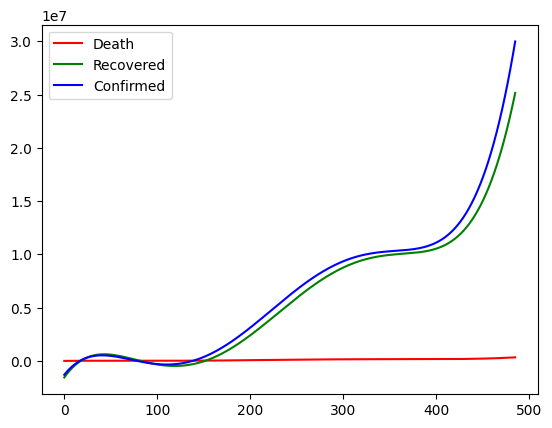

In [122]:

plt.plot(X,poly_d_reg_model.predict(poly_features),'-r',label='Death')
plt.plot(X,poly_r_reg_model.predict(poly_features),'-g',label='Recovered')
plt.plot(X,poly_c_reg_model.predict(poly_features),'-b',label='Confirmed')
plt.legend()
plt.show()

In [ ]:
poly_d_reg_model = LinearRegression()
poly_d_reg_model.fit(X_train_d, y_train_d)
print("Degree 4, Death Cases Train Score: "+str(poly_d_reg_model.score(X_train_d,y_train_d)))
print("Degree 4, Death Cases Test Score: "+str(poly_d_reg_model.score(X_test_d,y_test_d)))

poly_r_reg_model = LinearRegression()
poly_r_reg_model.fit(X_train_r, y_train_r)
print("Degree 4, Recovered Cases Train Score: "+str(poly_r_reg_model.score(X_train_r,y_train_r)))
print("Degree 4, Recovered Cases Test Score: "+str(poly_r_reg_model.score(X_test_r,y_test_r)))

poly_c_reg_model = LinearRegression()
poly_c_reg_model.fit(X_train_c, y_train_c)
print("Degree 4, Confirmed Cases Train Score: "+str(poly_c_reg_model.score(X_train_c,y_train_c)))
print("Degree 4, Confirmed Cases Test Score: "+str(poly_c_reg_model.score(X_test_c,y_test_c)))

Degree 4, Death Cases Train Score: 0.9705750578274651
Degree 4, Death Cases Test Score: 0.9630989692685621
Degree 4, Recovered Cases Train Score: 0.9583196893419964
Degree 4, Recovered Cases Test Score: 0.9490185007404542
Degree 4, Confirmed Cases Train Score: 0.9633585078845472
Degree 4, Confirmed Cases Test Score: 0.9585624068140775


In [ ]:
poly_d_reg_model = LinearRegression()
poly_d_reg_model.fit(X_train_d, y_train_d)
print("Degree 3, Death Cases Train Score: "+str(poly_d_reg_model.score(X_train_d,y_train_d)))
print("Degree 3, Death Cases Test Score: "+str(poly_d_reg_model.score(X_test_d,y_test_d)))

poly_r_reg_model = LinearRegression()
poly_r_reg_model.fit(X_train_r, y_train_r)
print("Degree 3, Recovered Cases Train Score: "+str(poly_r_reg_model.score(X_train_r,y_train_r)))
print("Degree 3, Recovered Cases Test Score: "+str(poly_r_reg_model.score(X_test_r,y_test_r)))

poly_c_reg_model = LinearRegression()
poly_c_reg_model.fit(X_train_c, y_train_c)
print("Degree 3, Confirmed Cases Train Score: "+str(poly_c_reg_model.score(X_train_c,y_train_c)))
print("Degree 3, Confirmed Cases Test Score: "+str(poly_c_reg_model.score(X_test_c,y_test_c)))

Degree 3, Death Cases Train Score: 0.9425457113585765
Degree 3, Death Cases Test Score: 0.9176103174594283
Degree 3, Recovered Cases Train Score: 0.9384884802641279
Degree 3, Recovered Cases Test Score: 0.9150009525267708
Degree 3, Confirmed Cases Train Score: 0.929518645090375
Degree 3, Confirmed Cases Test Score: 0.9090308838119633


In [ ]:
poly_d_reg_model = LinearRegression()
poly_d_reg_model.fit(X_train_d, y_train_d)
print("Degree 2, Death Cases Train Score: "+str(poly_d_reg_model.score(X_train_d,y_train_d)))
print("Degree 2, Death Cases Test Score: "+str(poly_d_reg_model.score(X_test_d,y_test_d)))

poly_r_reg_model = LinearRegression()
poly_r_reg_model.fit(X_train_r, y_train_r)
print("Degree 2, Recovered Cases Train Score: "+str(poly_r_reg_model.score(X_train_r,y_train_r)))
print("Degree 2, Recovered Cases Test Score: "+str(poly_r_reg_model.score(X_test_r,y_test_r)))

poly_c_reg_model = LinearRegression()
poly_c_reg_model.fit(X_train_c, y_train_c)
print("Degree 2, Confirmed Cases Train Score: "+str(poly_c_reg_model.score(X_train_c,y_train_c)))
print("Degree 2, Confirmed Cases Test Score: "+str(poly_c_reg_model.score(X_test_c,y_test_c)))

Degree 2, Death Cases Train Score: 0.9397307056925687
Degree 2, Death Cases Test Score: 0.9208800318269914
Degree 2, Recovered Cases Train Score: 0.9379243916116221
Degree 2, Recovered Cases Test Score: 0.9172773205411674
Degree 2, Confirmed Cases Train Score: 0.9281184497485941
Degree 2, Confirmed Cases Test Score: 0.9041567037684443


In [ ]:
country_data = data.drop(columns=['SNo', 'Last Update','Province/State'])

country_data["ObservationDate"] = country_data["ObservationDate"].apply(lambda x:int(datetime.strptime(x,"%m/%d/%Y").toordinal()))
firstday = country_data["ObservationDate"].iloc[0]
country_data["ObservationDate"] = country_data["ObservationDate"].apply(lambda x: x-firstday)

aggregation_functions = {'Deaths': 'sum','Recovered': 'sum', 'Confirmed': 'sum'}
country_data = country_data.groupby(['ObservationDate','Country/Region'], as_index=False).aggregate(aggregation_functions).reindex(columns=country_data.columns)

countries = ["Mainland China", "US", "South Korea", "Italy", "India"]
country_data = country_data[country_data['Country/Region'].isin(countries)]

country_data = pd.get_dummies(country_data, columns = ["Country/Region"])
country_data.head()

,ObservationDate,Confirmed,Deaths,Recovered,Country/Region_India,Country/Region_Italy,Country/Region_Mainland China,Country/Region_South Korea,Country/Region_US
5,0,547.0,17.0,28.0,0,0,1,0,0
6,0,1.0,0.0,0.0,0,0,0,1,0
9,0,1.0,0.0,0.0,0,0,0,0,1
18,1,1082.0,34.0,58.0,0,0,1,0,0
23,1,1.0,0.0,0.0,0,0,0,1,0


In [ ]:
X = country_data.drop(columns = ["Confirmed","Deaths","Recovered"])
y = country_data[["Confirmed","Deaths","Recovered"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
print("Train Score: "+str(dtr.score(X_train,y_train)))
print("Test Score: "+str(dtr.score(X_test,y_test)))

Train Score: 1.0
Test Score: 0.9998822287166734


In [ ]:
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(dtr, 
#                    feature_names=["ObservationDate","Country/Region_India","Country/Region_Italy","Country/Region_Mainland China","Country/Region_South Korea","Country/Region_US"],  
#                    class_names=["Confirmed","Deaths","Recovered"],
#                    filled=True)